<a href="https://colab.research.google.com/github/DouglasHoffmann/IACargas/blob/master/TCCDouglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalações e importações necessárias

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
!pip install mplfinance --upgrade --no-cache-dir
import yfinance as yf
import mplfinance as mpf
yf.pdr_override()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas_datareader.data as web
import seaborn as sns
from google.colab import files
from google.colab import drive
drive.mount('/drive')


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)
Requirement already up-to-date: mplfinance in /usr/local/lib/python3.6/dist-packages (0.12.7a0)
Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


**Coletando os valores desejados**

In [ ]:
acoes = ["^BVSP", "USDBRL=X", "MGLU3.SA", "ITUB4.SA", "BTOW3.SA", "TOTS3.SA"]
acoesMGLU = ["MGLU3.SA"]
acoesITUB4 = ["ITUB4.SA"]
acoesBTWO3 = ["BTOW3.SA"]
acoesUSDBRL = ["USDBRL=X"]
carteira  = web.get_data_yahoo(acoes, start="2015-01-01")#["Close"]
carteiraMGLU  = web.get_data_yahoo(acoesMGLU, start="2015-01-01")#["Close"]
carteiraITUB4  = web.get_data_yahoo(acoesITUB4, start="2015-01-01")#["Close"]
carteiraBTWO3  = web.get_data_yahoo(acoesBTWO3, start="2015-01-01")#["Close"]
carteiraUSDBRL  = web.get_data_yahoo(acoesUSDBRL, start="2015-01-01")#["Close"]

##db = pd.DataFrame()
db = carteira
db.to_csv('/drive/My Drive/TCC/28092020.csv')

dbMGLU = carteiraMGLU
dbITUB4 = carteiraITUB4
dbBTWO3 = carteiraBTWO3
dbUSDBRL = carteiraUSDBRL

dbMGLU.to_csv('/drive/My Drive/TCC/acoesMGLU.csv')
dbITUB4.to_csv('/drive/My Drive/TCC/acoesITUB4.csv')
dbBTWO3.to_csv('/drive/My Drive/TCC/acoesBTWO3.csv')
dbUSDBRL.to_csv('/drive/My Drive/TCC/acoesUSDBRL.csv')




#data = pd.read_csv("/drive/My Drive/TCC/0004.csv", usecols= ['Date','Open', 'High', 'Low', 'Close', 'Volume'])
#data = pd.read_csv("/drive/My Drive/TCC/28092020.csv", usecols= ['Date','Open', 'High', 'Low', 'Close', 'Volume'])
dataMGLU = pd.read_csv("/drive/My Drive/TCC/acoesMGLU.csv", usecols= ['Date','Open', 'High', 'Low', 'Close', 'Adj Close','Volume'])

dataMGLU['Date'] = pd.to_datetime(dataMGLU['Date'])
dataMGLU.set_index('Date', inplace=True)
dataMGLU.describe()

import warnings
warnings.filterwarnings("ignore")

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Exibindo Infos

In [ ]:
dataMGLU.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1445 entries, 2015-01-02 to 2020-10-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1445 non-null   float64
 1   High       1445 non-null   float64
 2   Low        1445 non-null   float64
 3   Close      1445 non-null   float64
 4   Adj Close  1445 non-null   float64
 5   Volume     1445 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.0 KB


Removendo Nulos

In [ ]:
dataMGLU = dataMGLU.dropna()
dataMGLU.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1445 entries, 2015-01-02 to 2020-10-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1445 non-null   float64
 1   High       1445 non-null   float64
 2   Low        1445 non-null   float64
 3   Close      1445 non-null   float64
 4   Adj Close  1445 non-null   float64
 5   Volume     1445 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.0 KB


Plotando Dados

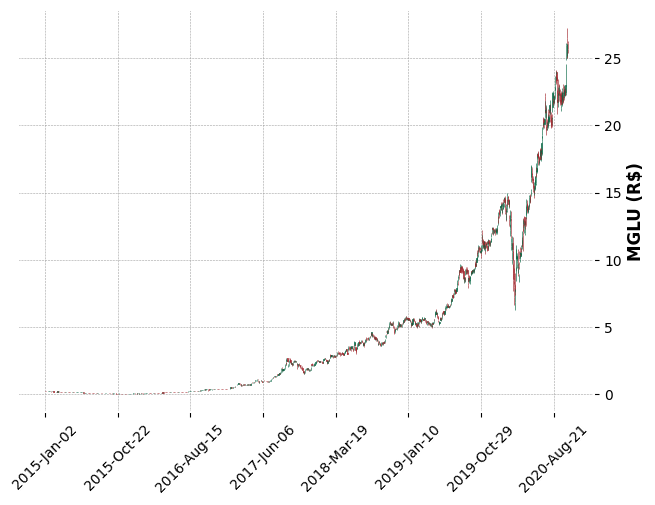

In [ ]:
#Plotting...
import mplfinance as mpf
graph = dataMGLU.copy()
mpf.plot(dataMGLU[pd.to_datetime('01-02-2015'):pd.to_datetime('19-10-2020')], type='candle', figscale=1.0, volume=False, style='charles', ylabel='MGLU (R$)')


Extraindo

In [ ]:
#Extracting Features
dataMGLU['Close_Tomorrow'] = dataMGLU['Close'].shift(-1)
dataMGLU['Return'] = dataMGLU['Close_Tomorrow'] - dataMGLU['Close']
dataMGLU

,Open,High,Low,Close,Adj Close,Volume,Close_Tomorrow,Return
Date,,,,,,,,
2015-01-02,0.243750,0.243750,0.231562,0.232812,-0.011344,6323200,0.237187,0.004375
2015-01-05,0.235625,0.240625,0.229687,0.237187,-0.011558,10326400,0.234062,-0.003125
2015-01-06,0.238437,0.238437,0.233125,0.234062,-0.011405,12572800,0.241875,0.007813
2015-01-07,0.237500,0.242187,0.234687,0.241875,-0.011786,6454400,0.240000,-0.001875
2015-01-08,0.239375,0.242187,0.237500,0.240000,-0.011695,8393600,0.231875,-0.008125
...,...,...,...,...,...,...,...,...
2020-10-20,25.799999,26.139999,25.650000,26.040001,26.040001,27788700,26.219999,0.179998
2020-10-21,26.000000,26.799999,25.959999,26.219999,26.219999,35433800,26.100000,-0.119999
2020-10-22,26.350000,26.400000,26.000000,26.100000,26.100000,23097100,25.770000,-0.330000


Normalizar os Dados

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for c in dataMGLU.columns:
    dataMGLU[c+'_Norm'] = scaler.fit_transform(dataMGLU[c].to_numpy().reshape(-1, 1))
dataMGLU = dataMGLU.dropna()

Separando os dados

In [ ]:

train = dataMGLU[pd.to_datetime('2015-01-02'):pd.to_datetime('2016-12-20')]
train_x = dataMGLU[['Open_Norm','High_Norm','Low_Norm','Close_Norm','Volume_Norm']].to_numpy()
train_y = dataMGLU[['Return_Norm']].to_numpy()

val = dataMGLU[pd.to_datetime('2018-01-02'):pd.to_datetime('2019-12-30')]
val_x = dataMGLU[['Open_Norm','High_Norm','Low_Norm','Close_Norm','Volume_Norm']].to_numpy()
val_y = dataMGLU[['Return_Norm']].to_numpy()

test = dataMGLU[pd.to_datetime('2020-01-02'):pd.to_datetime('2020-10-19')]
test_x = dataMGLU[['Open_Norm','High_Norm','Low_Norm','Close_Norm','Volume_Norm']]
test_y = dataMGLU[['Return_Norm', 'Return']]



Modelo


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 30)                180       
_________________________________________________________________
dense_37 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_38 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 31        
Total params: 2,071
Trainable params: 2,071
Non-trainable params: 0
_________________________________________________________________


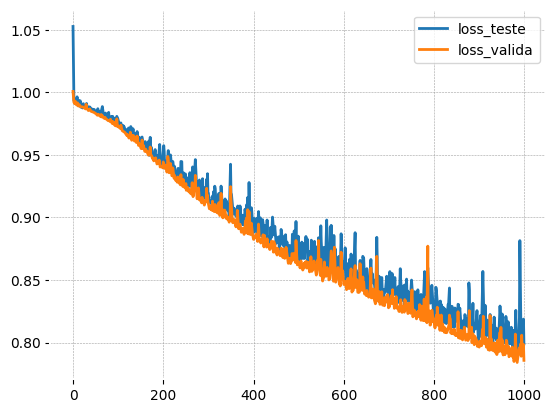

In [ ]:
#Model
from keras import models
from keras import layers
from keras.layers import Dense
model = models.Sequential()
model.add(layers.Dense(30, input_dim = train_x.shape[1], activation = "relu"))
model.add(layers.Dense(30, activation ="relu"))
model.add(layers.Dense(30, activation ="relu"))
model.add(layers.Dense(1))  
model.summary()

model.compile(
optimizer = 'adam',
loss = 'mean_squared_error', #mean_squared_error
)
results = model.fit(
train_x, train_y,
epochs= 1000,
batch_size = 128,
validation_data = (val_x, val_y),
verbose = 0
)

plt.plot(results.history["loss"], label="loss_teste")
plt.plot(results.history["val_loss"], label="loss_valida")
plt.legend()
plt.show()

In [ ]:
pred = model.predict(test_x)
pred = scaler.inverse_transform(pred)
test_y['Return_Predicted'] = pred

test_y['Movement_Predicted'] = [ 'Up' if p > 0 else 'Down' for p in pred]
test_y['Movement_Real'] = [ 'Up' if m > 0 else 'Down' for m in test_y['Return']]


test_y['Hit'] = [ 1 if m[1]['Movement_Real'] == m[1]['Movement_Predicted'] else 0 for m in test_y.iterrows()]
test_y['Investiment_Return'] = [m[1]['Return'] if m[1]['Movement_Predicted'] == 'Up' else 0 for m in test_y.iterrows()]


média de acertos (Acc) de sobe e desce do mercado no período e o retorno total de nossa estratégia.

In [ ]:
print('Acurácia: ',test_y['Hit'].mean())
print('Retorno da Estratégia:  R$',test_y['Investiment_Return'].sum())
print('Compra e Venda: R$',test_y['Return'].sum())

Acurácia:  0.5796398891966759
Retorno da Estratégia:  R$ 43.31004385650155
Compra e Venda: R$ 25.237187311053273


Primeiro valor da ação

In [ ]:
print('\nInvestimento: R$\n',dataMGLU[pd.to_datetime('2015-01-02'):].head(1)['Open'])


Investiment: R$
 Date
2015-01-02    0.24375
Name: Open, dtype: float64


Plotando

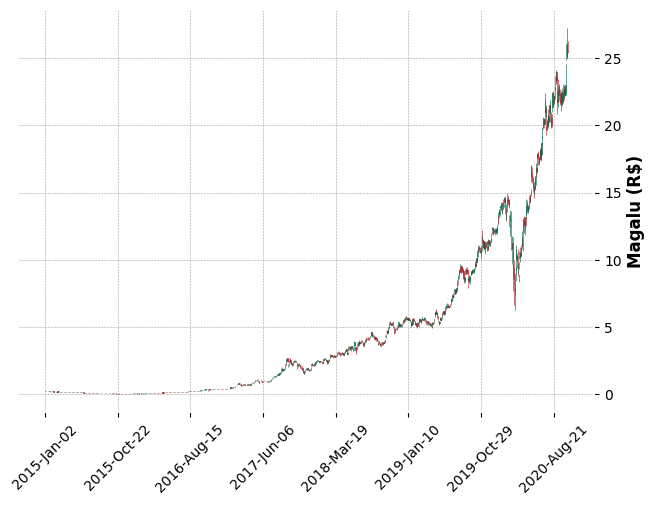

In [ ]:
import mplfinance as mpf
graph = dataMGLU.copy()
mpf.plot(dataMGLU[pd.to_datetime('01-02-2015'):pd.to_datetime('19-10-2020')], type='candle', figscale=1.0, volume=False, style='charles', ylabel='Magalu (R$)')